In [1]:
import numpy as np
import matplotlib.pyplot as plt # use matplotlib for plotting with inline plots %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # for deprecated matplotlib functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import roc_curve, auc
import graphviz 
from graphviz import Digraph
import os

In [2]:
# load data
spamdata = np.genfromtxt("/Users/zhangjiahang/Desktop/CS 178/Final project/spambase.txt",delimiter=",")
X, Y = spamdata[:,0:57], spamdata[:,-1]
scaler = StandardScaler()
X = scaler.fit_transform(X)

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size = 0.25, shuffle = True)

features = []
with open ("/Users/zhangjiahang/Desktop/CS 178/Final project/spambasenames.txt", encoding = "utf-8" ) as line_list:
    for line in line_list:
        feature = line.split(":")
        features.append(feature[0])
print(features)

targets = ["spam", "nonspam"]

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

0.9649275362318841
0.9218071242397915


([<matplotlib.axis.XTick at 0x120959a90>,
 <a list of 6 Text xticklabel objects>)

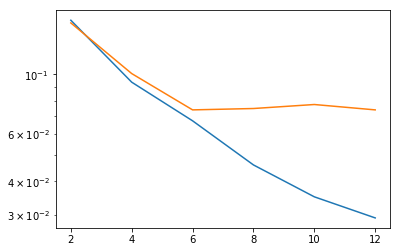

In [3]:
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf.fit(Xtr, Ytr)

os.environ["PATH"] += os.pathsep + '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/graphviz/'
# dot_data = tree.export_graphviz(clf, out_file=None)
# graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names= features,class_names=targets,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)
#print(graph.source)
#graph.render('/Users/zhangjiahang/Desktop/CS 178/Final project/dt.gv', view=True) 
print(clf.score(Xtr, Ytr))
print(clf.score(Xte, Yte))
#, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36


m_depth = [2, 4, 6, 8, 10, 12]
err_train = []
err_test = []
for i in m_depth:
    clf = tree.DecisionTreeClassifier(max_depth = i)
    clf.fit(Xtr, Ytr)
    err_train.append(1-clf.score(Xtr, Ytr))
    err_test.append(1-clf.score(Xte, Yte))

plt.semilogy(m_depth, err_train)
plt.semilogy(m_depth, err_test)
plt.xticks([2, 4, 6, 8, 10, 12])  